In [1]:
from pathlib import Path
import torch
import numpy as np

from torch import cuda
import pytorch_lightning as pl
from pytorch_lightning.callbacks.model_checkpoint import ModelCheckpoint
import seaborn as sns
import matplotlib.pyplot as plt

from utils import io
from models import SegmentationModel

/home/students/s265780/.conda-envs/py310/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
#reports/unet_2/unet_2/epoch=85-val_rmse=7.71.ckpt  first ok
#reports/unet_2/unet_2/epoch=86-val_rmse=8.59.ckpt add torch.where()
#reports/unet_2/unet_2/epoch=72-val_rmse=7.35.ckpt add mask mult

model = SegmentationModel.load_from_checkpoint(Path("reports/unet_2/unet_2/epoch=77-val_rmse=7.66.ckpt"))

In [3]:
model.eval();

In [11]:
input_path = Path("data/24h_10mmMAX_OI")
indices_one, indices_zero, mask = io.get_mask_indices(input_path, True) #why False?
case_study_max=483.717752
available_models = ["bol00", "e1000", "c2200", "c5m00"]
x, y, in_features, out_features = io.load_data('unet', input_path, ["20180706"], case_study_max, indices_one, indices_zero, available_models)


In [20]:
logit_seg, logit_class = model(torch.from_numpy(x).to('cuda'), None, None)

logit_seg_numpy = logit_seg.squeeze().to('cpu').detach().numpy()
logit_class = logit_class.squeeze().to('cpu').detach().numpy()

#seg = torch.round(torch.sigmoid(logit_seg)).squeeze().to('cpu').detach().numpy()
seg = logit_seg.sigmoid().gt(.5).squeeze().to('cpu').detach().numpy()

y_seg = torch.heaviside(torch.from_numpy(y).to('cuda'), torch.tensor([0]).float().to('cuda')).squeeze().to('cpu').detach().numpy()
y_seg_num = np.squeeze(np.where(y>0.001, 1, 0))

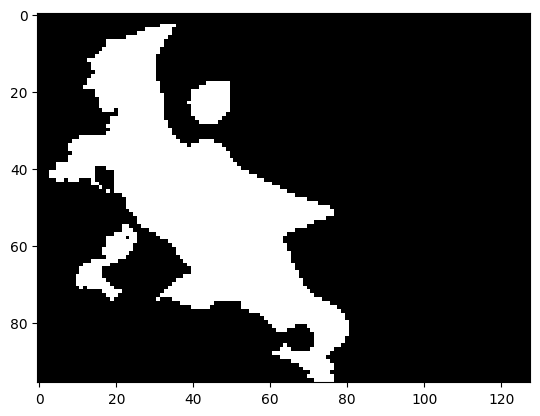

In [21]:
plt.imshow(seg, cmap='gray') #modello

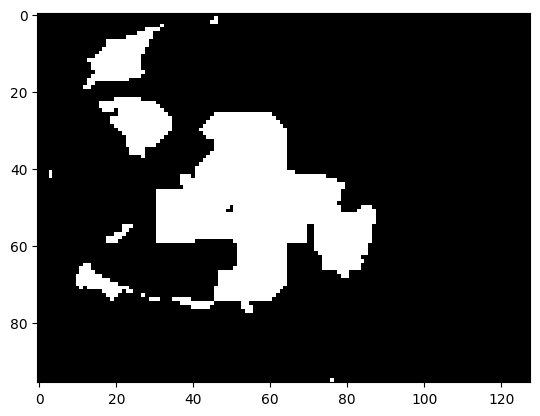

In [22]:
plt.imshow(y_seg_num, cmap='gray') #ground thruth

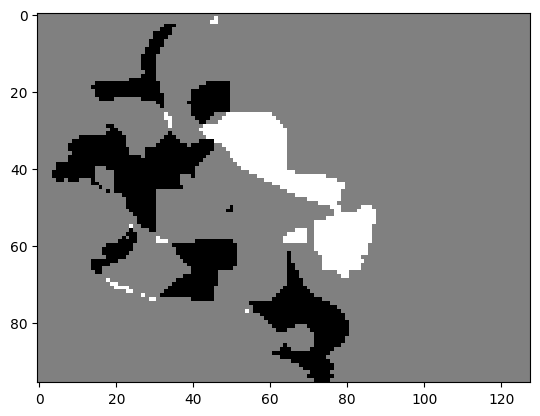

In [23]:
plt.imshow(y_seg_num-seg, cmap='gray') #parti bianche mancano nel modello

Text(0.5, 1.0, 'model_pred')

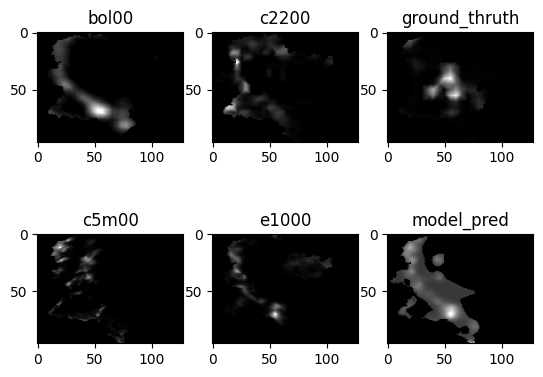

In [16]:
fig, axs = plt.subplots(2, 3)
axs[0, 0].imshow(x[0][0], cmap='gray', norm='linear')
axs[0, 0].set_title('bol00')
axs[0, 1].imshow(x[0][1], cmap='gray', norm='linear')
axs[0, 1].set_title('c2200')
axs[1, 0].imshow(x[0][2], cmap='gray', norm='linear')
axs[1, 0].set_title('c5m00')
axs[1, 1].imshow(x[0][3], cmap='gray', norm='linear')
axs[1, 1].set_title('e1000')
axs[0, 2].imshow(y[0], cmap='gray', norm='linear')
axs[0, 2].set_title('ground_thruth')
axs[1, 2].imshow(logit_class*mask, cmap='gray', norm='linear')
axs[1, 2].set_title('model_pred')

In [10]:
mask.sum()

5247.0